In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression
import shap

In [4]:
# Load dataset
file_path = "normalized_weather_data.csv"
df = pd.read_csv(file_path)

# Select relevant features and target variable
target = 'air_quality_PM2.5'
features = ['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm', 'pressure_mb', 'cloud']
df_filtered = df[features + [target]].dropna()
X = df_filtered[features]
y = df_filtered[target]

/var/folders/73/vs0s7fbn46s474zlzwkq72bm0000gn/T/ipykernel_82746/3583174989.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')


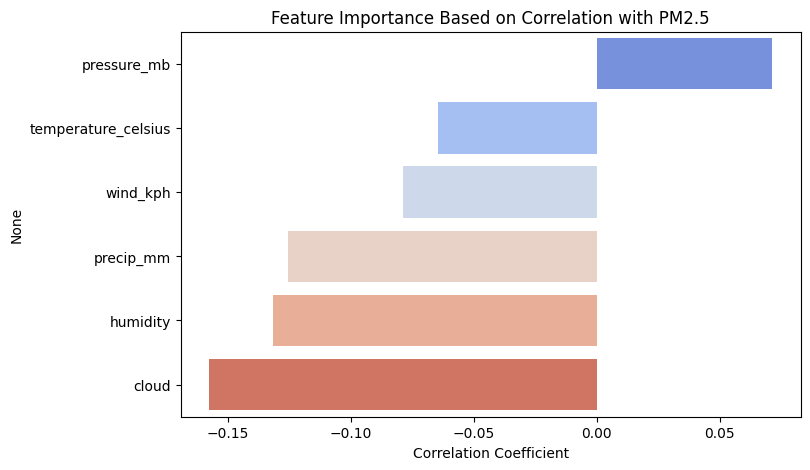

In [5]:
# Correlation-Based Feature Importance
correlation = df_filtered.corr()[target].drop(target).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title("Feature Importance Based on Correlation with PM2.5")
plt.xlabel("Correlation Coefficient")
plt.show()

/var/folders/73/vs0s7fbn46s474zlzwkq72bm0000gn/T/ipykernel_82746/1786579771.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


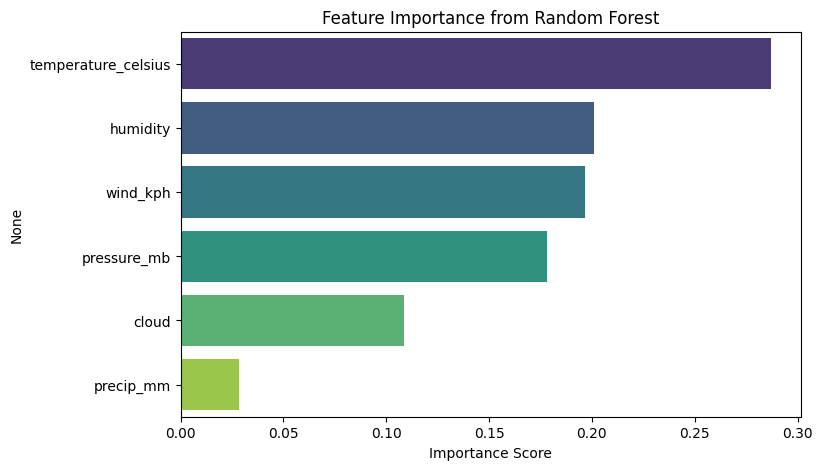

In [6]:
# Tree-Based Feature Importance (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.show()

/var/folders/73/vs0s7fbn46s474zlzwkq72bm0000gn/T/ipykernel_82746/3387387297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_importance_df.values, y=perm_importance_df.index, palette='magma')


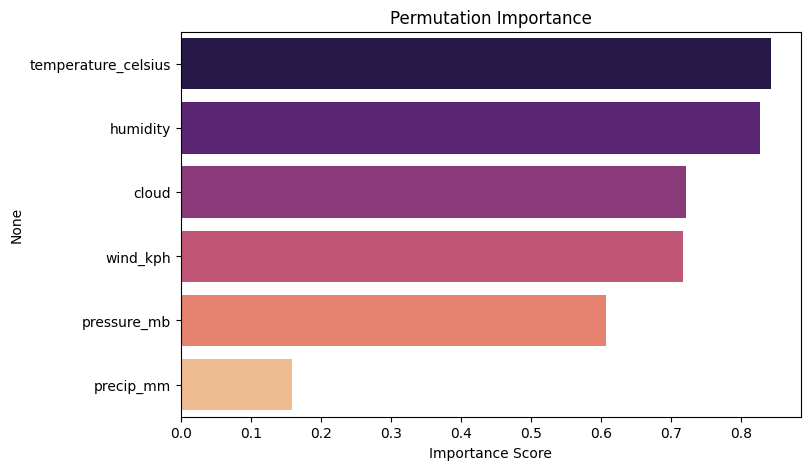

In [7]:
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
perm_importance_df = pd.Series(perm_importance.importances_mean, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=perm_importance_df.values, y=perm_importance_df.index, palette='magma')
plt.title("Permutation Importance")
plt.xlabel("Importance Score")
plt.show()

/var/folders/73/vs0s7fbn46s474zlzwkq72bm0000gn/T/ipykernel_82746/1719136885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_importance.values, y=mi_importance.index, palette='plasma')


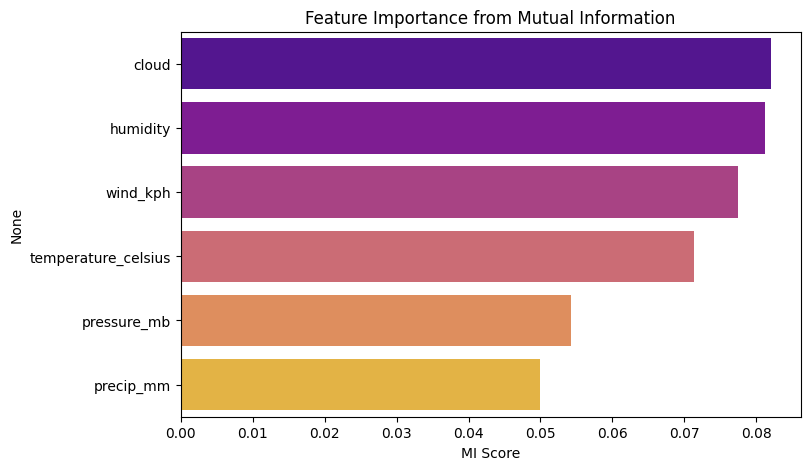

In [8]:
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_importance = pd.Series(mi_scores, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=mi_importance.values, y=mi_importance.index, palette='plasma')
plt.title("Feature Importance from Mutual Information")
plt.xlabel("MI Score")
plt.show()